# Классификация текстов с использованием Наивного Байесовского Классификатора

## Задание 1 (1 балл)

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [18]:
#импортируем необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [19]:
# откройте данные: ваш код здесь
email_data = pd.read_csv('spam_or_not_spam.csv')
email_data.head(3)

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0


In [20]:
# рассчитайте частоты для классов : ваш код здесь
freq = email_data['label'].value_counts(normalize=True).round(2)

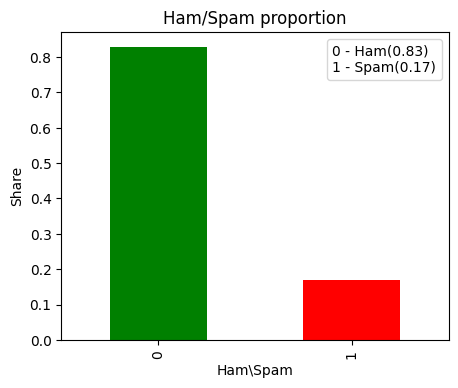

In [ ]:
# визуализируйте результат: ваш код здесь
label = '0 - Ham(' + str(freq[0]) + ')' + '\n1 - Spam(' + str(freq[1]) + ')' #создание легенды для графика
#отрисовка графика
plt.figure(figsize=(5,4))
freq.plot(kind='bar', color=['green', 'red'], title='Ham/Spam proportion', label=label)
plt.xlabel('Ham\Spam')
plt.ylabel('Share')
plt.legend(handlelength=0, handletextpad=0)
plt.show()

## Задание 2 (2 балла)

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

In [ ]:
#импортируем необходимые библиотеки
from sklearn.feature_extraction.text import CountVectorizer

Замените в данных все пустые строки и строки, состоящие из пробелов, на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [23]:
#ваш код здесь
email_data['email'] = email_data['email'].replace('', np.nan) #замена пустых строк на np.nan
email_data['email'] = email_data['email'].replace(' ', np.nan)#замена строк из пробелов на np.nan
email_data = email_data.dropna(how='any', axis=0) #удаление строк np.nan

Переводим данные в векторный вид:

In [24]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(email_data["email"])

Определите, сколько теперь признаков в нашем наборе данных:

In [25]:
#ваш код здесь
X.shape[1]

34116

## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [26]:
#ваш код здесь
y = email_data['label']

Разделите выборку на обучающую и тестовую, используя стратифицированное разбиение (параметр `stratify` установите в значение вектора ответов y) размер тестовой выборки (`test_size`) возьмите как 0.25, параметр `random_state` определите со значением 42:

In [27]:
#ваш код здесь
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.25, stratify=y)

Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [28]:
#ваш код здесь
y_test.mean().round(3)

np.float64(0.165)

## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [29]:
#ваш код здесь
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
cnb = ComplementNB(alpha=0.01)
cnb.fit(X_train,y_train)
mnb = MultinomialNB(alpha=0.01)
mnb.fit(X_train,y_train)


MultinomialNB(alpha=0.01)

Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

In [30]:
#ваш код здесь
print('Значение метрики accuracy на тестововй выборке для классификатоа ComplementNB: ', round(metrics.accuracy_score(y_test, cnb.predict(X_test)), 3))
print('Значение метрики precision на тестововй выборке для классификатоа ComplementNB: ',round(metrics.precision_score(y_test, cnb.predict(X_test)), 3))
print('Значение метрики F1 на тестововй выборке для классификатоа ComplementNB: ',round(metrics.f1_score(y_test, cnb.predict(X_test)), 3)) 
print('Значение метрики recall на тестововй выборке для классификатоа ComplementNB: ',round(metrics.recall_score(y_test, cnb.predict(X_test)), 3))
print('Значение метрики accuracy на тестововй выборке для классификатоа MultinomialNB: ',round(metrics.accuracy_score(y_test, mnb.predict(X_test)), 3))
print('Значение метрики precision на тестововй выборке для классификатоа MultinomialNB: ',round(metrics.precision_score(y_test, mnb.predict(X_test)), 3))
print('Значение метрики F1 на тестововй выборке для классификатоа MultinomialNB: ',round(metrics.f1_score(y_test, mnb.predict(X_test)), 3))
print('Значение метрики recall на тестововй выборке для классификатоа MultinomialNB: ',round(metrics.recall_score(y_test, mnb.predict(X_test)), 3))

Значение метрики accuracy на тестововй выборке для классификатоа ComplementNB:  0.988
Значение метрики precision на тестововй выборке для классификатоа ComplementNB:  1.0
Значение метрики F1 на тестововй выборке для классификатоа ComplementNB:  0.962
Значение метрики recall на тестововй выборке для классификатоа ComplementNB:  0.927
Значение метрики accuracy на тестововй выборке для классификатоа MultinomialNB:  0.987
Значение метрики precision на тестововй выборке для классификатоа MultinomialNB:  1.0
Значение метрики F1 на тестововй выборке для классификатоа MultinomialNB:  0.958
Значение метрики recall на тестововй выборке для классификатоа MultinomialNB:  0.919


Нарисуйте ROC-кривую:

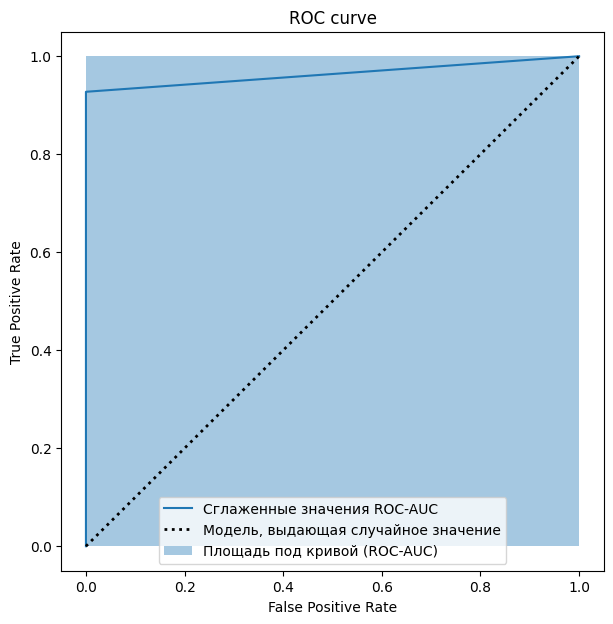

In [31]:
#ваш код здесь
false_positive_rates, true_positive_rates, threshold = metrics.roc_curve(y_test, cnb.predict(X_test))
# создаём график
plt.figure(figsize=(7, 7))

# рисуем кривую
plt.plot(false_positive_rates, true_positive_rates, 
         label='Сглаженные значения ROC-AUC')

# кривая, соответствующая случайному угадыванию
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle=':', 
         label='Модель, выдающая случайное значение')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.fill_between(false_positive_rates, true_positive_rates, step="pre", 
                 alpha=0.4, label='Площадь под кривой (ROC-AUC)')
plt.legend()
plt.show()

## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

In [ ]:
#ваш код здесь

alpha_range = np.linspace(0.000001, 0.01, 25)
f1_scores = []
accuracy = []

for i in range(len(alpha_range)): #цикл для расчета метрик при различном aplha
    cnb_cyc = ComplementNB(alpha=alpha_range[i])
    cnb_cyc.fit(X_train,y_train)
    f1_scores.append(round(metrics.f1_score(y_test, cnb_cyc.predict(X_test)), 3))
    accuracy.append(round(metrics.accuracy_score(y_test, cnb_cyc.predict(X_test)), 3))
    print('F1 score: ',f1_scores[-1], '\nAccuracy score: ', accuracy[-1], '\nAlpha: ',alpha_range[i])

Вывод: значение параметра alpha напрямую влияет на качество классификации методом ComplementNB.